## 📌 Project: Airbnb Listing Analysis

In [15]:

## This dataset contains 100 Airbnb listings with detailed information 

#The data represents listings from the Airbnb platform — a global online marketplace for short-term rentals. 

#In this project, I will:
#1. Import and understand the dataset
#2. Explore the structure and key statistics
#3. Analyze listing patterns (e.g., price trends, room types, availability)
#4. Visualize the data to gain better insights
#5. Answer key business questions such as:
  # - What is the average price per neighborhood?
   #- Which room type is most common?
  # - What’s the relationship between price and reviews?

#This notebook is structured to reflect a full data analysis pipeline:
#📥 Import → 🔍 Explore → 📊 Analyze → 🖼️ Visualize → 📌 Conclude

In [23]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [24]:
df = pd.read_excel(r"C:\Users\Dell\Downloads\airbnb_100_listings.xlsx")

# exploring the dataset

In [26]:
df.head()

,id,name,host_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
0,1001,Listing 1,Mike,Zuid,Private room,177,5,155,338
1,1002,Listing 2,Tom,Zuid,Entire home,151,5,42,109
2,1003,Listing 3,Anna,Zuid,Entire home,186,4,18,110
3,1004,Listing 4,Sara,Oostelijk Haven,Shared room,125,5,67,150
4,1005,Listing 5,Elisabeth,Bos en Lommer,Entire home,290,4,83,97


In [29]:
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 100 non-null    int64 
 1   name               100 non-null    object
 2   host_name          100 non-null    object
 3   neighbourhood      100 non-null    object
 4   room_type          100 non-null    object
 5   price              100 non-null    int64 
 6   minimum_nights     100 non-null    int64 
 7   number_of_reviews  100 non-null    int64 
 8   availability_365   100 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 7.2+ KB


Index(['id', 'name', 'host_name', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'availability_365'],
      dtype='object')

# Is there a null data

In [48]:
df.isnull().sum()

id                   0
name                 0
host_name            0
neighbourhood        0
room_type            0
price                0
minimum_nights       0
number_of_reviews    0
availability_365     0
dtype: int64

# Analyz the dataset

## How many listings are there in each neighborhood?

In [35]:
df.groupby('neighbourhood')['id'].count()

neighbourhood
Bos en Lommer      14
Centrum-Oost       15
Centrum-West       14
De Baarsjes         8
Oostelijk Haven    16
Westerpark         14
Zuid               19
Name: id, dtype: int64

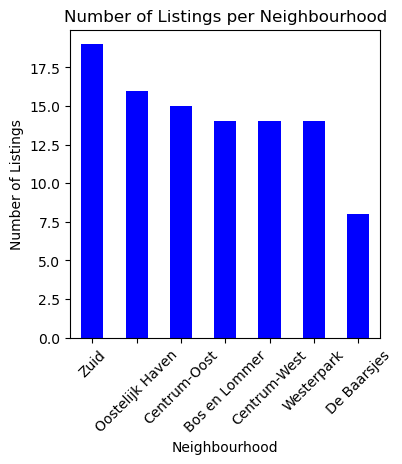

In [87]:
import matplotlib.pyplot as plt
import pandas as pd


neighbourhood_counts = df.groupby('neighbourhood')['id'].count().sort_values(ascending=False)


plt.figure(figsize=(4, 4))
neighbourhood_counts.plot(kind='bar', color='blue')

plt.title('Number of Listings per Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()



## What is the average price per neighborhood?

In [69]:
 df.groupby('neighbourhood')['price'].mean()

neighbourhood
Bos en Lommer      158.285714
Centrum-Oost       169.600000
Centrum-West       183.214286
De Baarsjes        144.750000
Oostelijk Haven    186.562500
Westerpark         171.214286
Zuid               184.421053
Name: price, dtype: float64

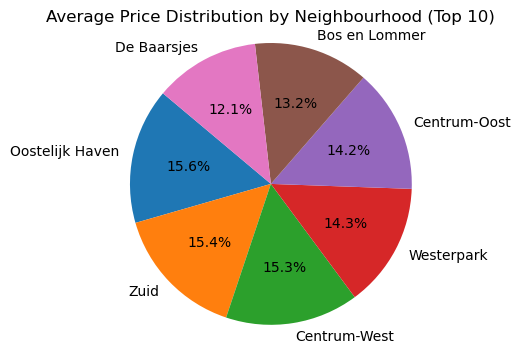

In [89]:
import matplotlib.pyplot as plt
avg_price = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
avg_price_top10 = avg_price.head(10)

# Plot a pie chart
plt.figure(figsize=(4, 4))
plt.pie(avg_price_top10, labels=avg_price_top10.index, autopct='%1.1f%%', startangle=140)

plt.title('Average Price Distribution by Neighbourhood (Top 10)')
plt.axis('equal')  

plt.show()

## What room type is most common?

In [78]:
df['room_type'].value_counts()

room_type
Private room    39
Entire home     32
Shared room     29
Name: count, dtype: int64

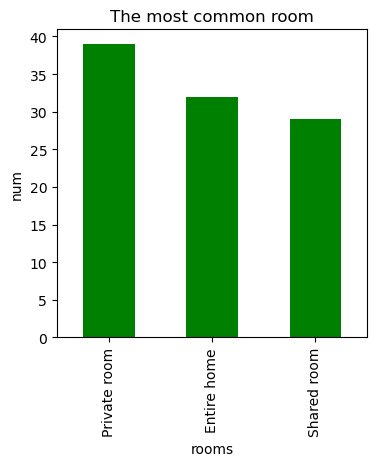

In [85]:
import matplotlib.pyplot as plt
rooms_types=df['room_type'].value_counts()
plt.figure(figsize=(4,4))
rooms_types.plot(kind='bar', color='green')

plt.title('The most common room')
plt.xlabel('rooms')
plt.ylabel('num')
plt.show()

In [81]:
df['room_type'].mode()[0]

'Private room'

## What is the average number of reviews per room type?

In [91]:
df.groupby('room_type')['number_of_reviews'].mean()

room_type
Entire home     100.281250
Private room    103.487179
Shared room      97.931034
Name: number_of_reviews, dtype: float64

## What are the maximum and minimum prices?

In [99]:
df['price'].max()

300

In [97]:
df['price'].min()

54

## Is there a relationship between price and number of reviews?

                      price  number_of_reviews
price              1.000000          -0.078073
number_of_reviews -0.078073           1.000000


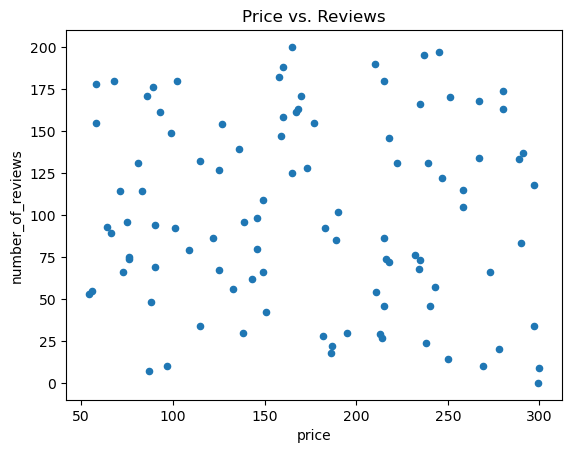

In [110]:
# Quick scatter with pandas
df.plot.scatter(x='price', y='number_of_reviews', title='Price vs. Reviews');

# Quick correlation
print(df[['price','number_of_reviews']].corr())